# Data Loading

In [ ]:
#import library

In [35]:
import pandas as pd
import string
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [ ]:
#Data Loading

In [36]:
df = pd.read_csv('emails.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [37]:
df

,Email_ID,Subject,Body,Category
0,1,Sale on Electronics,Get 50% off on all electronics today!,Spam
1,2,Meeting Reminder,Don’t forget the team meeting tomorrow at 10 AM.,Important
2,3,Win a Free Vacation,Claim your free vacation now! Click here!,Spam
3,4,Project Update,The latest project update is available on the ...,Important
4,5,Discount Offer,Exclusive 30% discount on your next purchase!,Spam
...,...,...,...,...
205,196,Special Discount on New Products,Get a discount on our new products for a limit...,Spam
206,197,Upcoming Workshop Details,Details for the upcoming workshop are now avai...,Important
207,198,Exclusive Member Sale,Enjoy an exclusive sale available only to memb...,Spam
208,199,Order Confirmation,Your order confirmation is attached. Thank you!,Important


In [4]:
df.head(4)

,Email_ID,Subject,Body,Category,Unnamed: 4
0,1,Sale on Electronics,Get 50% off on all electronics today!,Spam,NaN
1,2,Meeting Reminder,Don’t forget the team meeting tomorrow at 10 AM.,Important,NaN
2,3,Win a Free Vacation,Claim your free vacation now! Click here!,Spam,NaN
3,4,Project Update,The latest project update is available on the ...,Important,NaN


# Data Cleaning and Preprocessing

In [ ]:
#Missing Values

In [38]:
missing_subject = df['Subject'].isnull().sum()
print("Missing values in 'Subject':", missing_subject)
missing_body = df['Body'].isnull().sum()
print("Missing values in 'Body':", missing_body)

Missing values in 'Subject': 0
Missing values in 'Body': 0


In [ ]:
#Text Cleaning

In [39]:
def clean_text(text):
    # Remove leading/trailing whitespace and convert to lowercase
    text = text.strip().lower()
    # Remove punctuation and numbers
    text = text.translate(str.maketrans('', '', string.punctuation + '0123456789'))
    # Tokenize by splitting into words
    tokens = text.split()
    return tokens

# Apply the cleaning function to 'Subject' and 'Body' columns
df['Cleaned_Subject'] = df['Subject'].apply(clean_text)
df['Cleaned_Body'] = df['Body'].apply(clean_text)

df = df.dropna(axis=1, how='all')
print(df[['Email_ID', 'Cleaned_Subject', 'Cleaned_Body']].head())


   Email_ID           Cleaned_Subject  \
0         1   [sale, on, electronics]   
1         2       [meeting, reminder]   
2         3  [win, a, free, vacation]   
3         4         [project, update]   
4         5         [discount, offer]   

                                        Cleaned_Body  
0            [get, off, on, all, electronics, today]  
1  [don’t, forget, the, team, meeting, tomorrow, ...  
2    [claim, your, free, vacation, now, click, here]  
3  [the, latest, project, update, is, available, ...  
4    [exclusive, discount, on, your, next, purchase]  


# Feature Extraction 

In [40]:
#Text_Vectorization_Cleaned_Subject
text_data = df['Cleaned_Subject'].astype(str).tolist()
text_data

bow = CountVectorizer(stop_words='english')
bow.fit(text_data)

bow.get_feature_names_out()

array(['account', 'activity', 'agenda', 'alert', 'announcement', 'annual',
       'apparel', 'appliances', 'application', 'appointment', 'arrivals',
       'available', 'big', 'buy', 'card', 'client', 'clothing', 'code',
       'company', 'confirmation', 'congratulations', 'credit', 'customer',
       'customers', 'data', 'deadline', 'deal', 'deals', 'details',
       'discount', 'discounts', 'electronics', 'ending', 'ends', 'event',
       'exclusive', 'extension', 'feature', 'feedback', 'final', 'flash',
       'followup', 'free', 'gift', 'home', 'important', 'information',
       'insurance', 'interview', 'investment', 'invitation', 'invoice',
       'items', 'job', 'just', 'laptop', 'launch', 'limited',
       'limitedtime', 'loyal', 'manager', 'marketing', 'meeting',
       'member', 'members', 'membership', 'monthly', 'needed', 'new',
       'newsletter', 'notice', 'notification', 'offer', 'online',
       'opening', 'opportunities', 'order', 'package', 'payment',
       'perform

In [55]:
#Bag of Words (BoW)
bow_features = bow.transform(text_data)
bow_features

bow_features_array = bow_features.toarray()
bow_features_array

for sentence, feature in zip(text_data, bow_features_array):
    print(sentence)
    print(feature)

['get', 'off', 'on', 'all', 'electronics', 'today']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
['don’t', 'forget', 'the', 'team', 'meeting', 'tomorrow', 'at', 'am']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 

In [42]:
#Text_Vectorization_Cleaned_Body 
text_data = df['Cleaned_Body'].astype(str).tolist()
text_data

bow = CountVectorizer(stop_words='english')
bow.fit(text_data)

bow.get_feature_names_out()

array(['account', 'act', 'activity', 'advantage', 'agenda', 'announce',
       'annual', 'apparel', 'appliances', 'application', 'apply',
       'appointment', 'appreciate', 'approaching', 'arrivals', 'arrive',
       'attached', 'available', 'big', 'buy', 'card', 'chance', 'changes',
       'check', 'claim', 'click', 'client', 'clothing', 'code', 'company',
       'confirmation', 'confirmed', 'contact', 'contest', 'credit',
       'customer', 'customers', 'data', 'date', 'days', 'deadline',
       'deal', 'deals', 'details', 'detected', 'development', 'discount',
       'discounts', 'discover', 'document', 'don', 'download',
       'electronics', 'ending', 'ends', 'enjoy', 'enter', 'event',
       'excited', 'exclusive', 'experience', 'explore', 'extended',
       'extra', 'fast', 'feature', 'feedback', 'final', 'financial',
       'flash', 'following', 'forget', 'free', 'friday', 'gift', 'great',
       'happening', 'help', 'hiring', 'home', 'huge', 'improve',
       'information', '

In [43]:
#Bag of Words (BoW)
bow_features = bow.transform(text_data)
bow_features

bow_features_array = bow_features.toarray()
bow_features_array

for sentence, feature in zip(text_data, bow_features_array):
    print(sentence)
    print(feature)

['get', 'off', 'on', 'all', 'electronics', 'today']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
['don’t', 'forget', 'the', 'team', 'meeting', 'tomorrow', 'at', 'am']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 

# Data Splitting

In [44]:


# Combine subject and body for feature extraction (joining tokens into strings)
df['combined_text'] = df['Cleaned_Subject'].apply(' '.join) + ' ' + df['Cleaned_Body'].apply(' '.join)

# Display the unique values in the Category column
print("Original Category Distribution:")
print(df['Category'].value_counts())

# Keep only rows where the Category is either "Spam" or "Important"
df_filtered = df[df['Category'].isin(['Spam', 'Important'])]

# Recheck the category distribution after filtering
print("\nFiltered Category Distribution:")
print(df_filtered['Category'].value_counts())

# Initialize Bag of Words (BoW) Vectorizer (CountVectorizer)
bow_vectorizer = CountVectorizer(max_features=1000)  # Limit to top 1000 features to control sparsity

# Apply BoW to the combined text
X_filtered = bow_vectorizer.fit_transform(df_filtered['combined_text'])

# Target variable (Spam or Important)
y_filtered = df_filtered['Category']

# Split the data into training and testing sets (80% train, 20% test), using stratification
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, stratify=y_filtered, random_state=42)

# Display the shape of the resulting datasets
print("\nTraining data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Original Category Distribution:
Category
Important                            105
Spam                                 101
 enjoy this exclusive offer!           2
 get one free offer!                   1
 enjoy these exclusive discounts!      1
Name: count, dtype: int64

Filtered Category Distribution:
Category
Important    105
Spam         101
Name: count, dtype: int64

Training data shape: (164, 323)
Testing data shape: (42, 323)
Training labels shape: (164,)
Testing labels shape: (42,)


# Model Building

In [45]:
#Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)

# Hyperparameter Tuning 
param_grid = {'alpha': [0.1, 1.0, 10.0]}
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("\nBest hyperparameters:", grid_search.best_params_)





Best hyperparameters: {'alpha': 10.0}


# Model Evaluation


Predicted Labels: ['Spam' 'Spam' 'Spam' 'Important' 'Important' 'Important' 'Important'
 'Spam' 'Important' 'Important' 'Spam' 'Important' 'Spam' 'Spam' 'Spam'
 'Spam' 'Important' 'Important' 'Spam' 'Important' 'Important' 'Spam'
 'Important' 'Spam' 'Spam' 'Spam' 'Spam' 'Important' 'Spam' 'Spam' 'Spam'
 'Important' 'Spam' 'Important' 'Spam' 'Important' 'Important' 'Important'
 'Important' 'Spam' 'Important' 'Spam']

Accuracy: 0.9761904761904762

Classification Report:
              precision    recall  f1-score   support

   Important       1.00      0.95      0.98        21
        Spam       0.95      1.00      0.98        21

    accuracy                           0.98        42
   macro avg       0.98      0.98      0.98        42
weighted avg       0.98      0.98      0.98        42



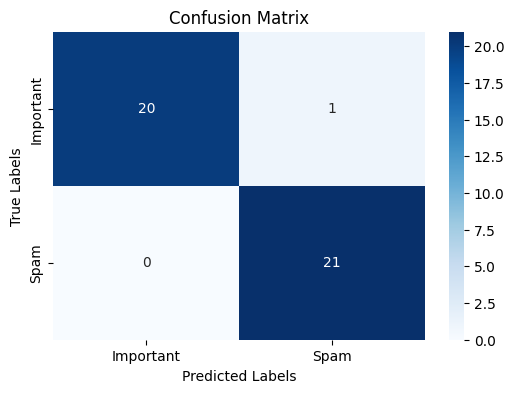


Cross-Validation Scores: [0.9047619  0.95238095]
Mean CV Score: 0.9285714285714286


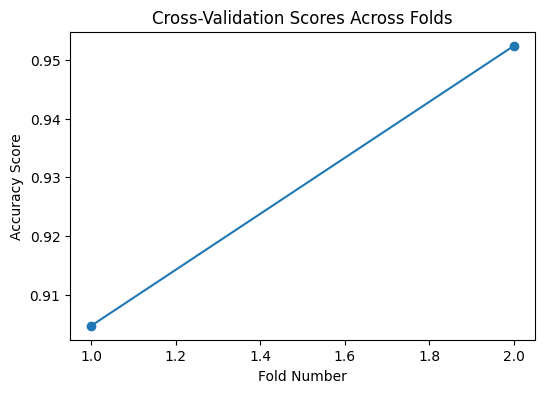

In [46]:
# 6. Model Evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Check the predictions
print("\nPredicted Labels:", y_pred)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Generate the classification report, handle undefined precision
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))  # Adjust zero_division as needed

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Important', 'Spam'], yticklabels=['Important', 'Spam'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

#Cross-Validation (Adjusting n_splits if needed)
cv = StratifiedKFold(n_splits=2)  # Adjust to a lower number if necessary
cv_scores = cross_val_score(best_model, X_test, y_pred, cv=cv)
print("\nCross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

plt.figure(figsize=(6,4))
plt.plot(range(1, len(cv_scores)+1), cv_scores, marker='o')
plt.title("Cross-Validation Scores Across Folds")
plt.xlabel("Fold Number")
plt.ylabel("Accuracy Score")
plt.show()

#  Model Interpretation


Top 10 important features (words) for Spam:
sale: -4.3405
our: -4.3775
on: -4.5192
special: -4.6102
free: -4.6343
for: -4.6589
exclusive: -4.7102
discount: -4.8513
flash: -4.8821
offer: -4.9138

Some Misclassified Emails:
Email ID: 40
Predicted: Spam, Actual: Important
Subject: Exclusive Event Invitation
Body: You are invited to an exclusive event next week!
--------------------------------------------------


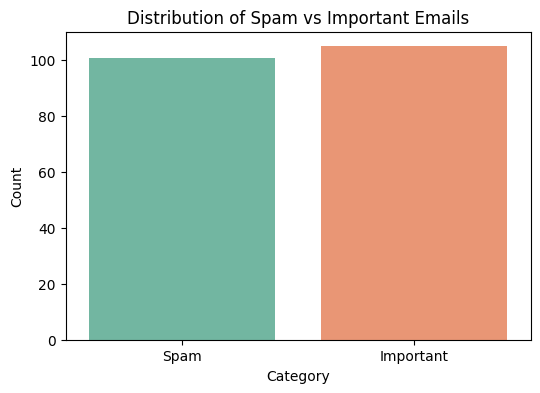

In [47]:
# Model Interpretation - Feature Importance
if hasattr(best_model, 'feature_log_prob_'):
    feature_importance = best_model.feature_log_prob_[1]  # Get the importance for the "Spam" category
    sorted_indices = feature_importance.argsort()[::-1]  # Sort indices from highest to lowest
    top_features = bow_vectorizer.get_feature_names_out()[sorted_indices][:10]  # Get top 10 features
    top_importance_scores = feature_importance[sorted_indices][:10]  # Get importance scores for top features

    print("\nTop 10 important features (words) for Spam:")
    for feature, score in zip(top_features, top_importance_scores):
        print(f"{feature}: {score:.4f}")

# Misclassifications
misclassified_indices = np.where(y_pred != y_test)[0]  # Find indices of misclassified emails
print("\nSome Misclassified Emails:")

for index in misclassified_indices[:5]:  # Show first 5 misclassified emails
    print(f"Email ID: {df_filtered.iloc[index]['Email_ID']}")  # Use df_filtered
    print(f"Predicted: {y_pred[index]}, Actual: {y_test.iloc[index]}")
    print(f"Subject: {df_filtered.iloc[index]['Subject']}")
    print(f"Body: {df_filtered.iloc[index]['Body']}")
    print("-" * 50)  # Separator for readability

# Distribution of Spam vs Important Emails Visualization
plt.figure(figsize=(6,4))
sns.countplot(data=df_filtered, x='Category', hue='Category', palette='Set2', legend=False)
plt.title("Distribution of Spam vs Important Emails")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


In [51]:
df.to_csv(r'C:\Users\maari\OneDrive\Desktop\Text Classification for Email Filtering\Email_Cleaned_Dataset.csv')
df

,Email_ID,Subject,Body,Category,Cleaned_Subject,Cleaned_Body,combined_text
0,1,Sale on Electronics,Get 50% off on all electronics today!,Spam,"[sale, on, electronics]","[get, off, on, all, electronics, today]",sale on electronics get off on all electronics...
1,2,Meeting Reminder,Don’t forget the team meeting tomorrow at 10 AM.,Important,"[meeting, reminder]","[don’t, forget, the, team, meeting, tomorrow, ...",meeting reminder don’t forget the team meeting...
2,3,Win a Free Vacation,Claim your free vacation now! Click here!,Spam,"[win, a, free, vacation]","[claim, your, free, vacation, now, click, here]",win a free vacation claim your free vacation n...
3,4,Project Update,The latest project update is available on the ...,Important,"[project, update]","[the, latest, project, update, is, available, ...",project update the latest project update is av...
4,5,Discount Offer,Exclusive 30% discount on your next purchase!,Spam,"[discount, offer]","[exclusive, discount, on, your, next, purchase]",discount offer exclusive discount on your next...
...,...,...,...,...,...,...,...
205,196,Special Discount on New Products,Get a discount on our new products for a limit...,Spam,"[special, discount, on, new, products]","[get, a, discount, on, our, new, products, for...",special discount on new products get a discoun...
206,197,Upcoming Workshop Details,Details for the upcoming workshop are now avai...,Important,"[upcoming, workshop, details]","[details, for, the, upcoming, workshop, are, n...",upcoming workshop details details for the upco...
207,198,Exclusive Member Sale,Enjoy an exclusive sale available only to memb...,Spam,"[exclusive, member, sale]","[enjoy, an, exclusive, sale, available, only, ...",exclusive member sale enjoy an exclusive sale ...
208,199,Order Confirmation,Your order confirmation is attached. Thank you!,Important,"[order, confirmation]","[your, order, confirmation, is, attached, than...",order confirmation your order confirmation is ...
